## Preprocessing

In [175]:
import numpy as np
import pandas as pd
from utils.preprocessing import load_entities, load_tokens, get_token_dict, process_entities_data

ImportError: cannot import name 'plot_confusion_matrix' from 'utils.classification_report' (/workspaces/ensae_nlp_project/utils/classification_report.py)

In [2]:
entities = load_entities('data/entities.json')
tokens = load_tokens('data/tokens.yml')
token_dict = get_token_dict(tokens)

In [3]:
df = process_entities_data(token_dict, entities)

  0%|          | 0/1218 [00:00<?, ?it/s]

 51%|█████     | 623/1218 [00:00<00:00, 2509.47it/s]

Error processing entry:  L. et Cher
Invalid line format: Expected even number of elements
Error processing entry:  L et Ch
Invalid line format: Expected even number of elements
Error processing entry: L. et Ch.
Invalid line format: Expected even number of elements
Error processing entry: Cher
Invalid line format: Expected even number of elements


100%|██████████| 1218/1218 [00:00<00:00, 2769.13it/s]


Error processing entry: $$
Invalid line format: Expected even number of elements
Error processing entry: +
Invalid line format: Expected even number of elements
Error processing entry: Mauplin ⒻPierre ⓂJournalier ⒽChef de ménage Ⓐ43 ⒸHomme marié Ⓘidem
Invalid line format: Expected even number of elements


## Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25074 entries, 0 to 25073
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   surname            19159 non-null  object
 1   firstname          24930 non-null  object
 2   occupation         16178 non-null  object
 3   age                16435 non-null  object
 4   civil_status       10704 non-null  object
 5   nationality        13314 non-null  object
 6   surname_household  5640 non-null   object
 7   link               20735 non-null  object
 8   birth_date         7344 non-null   object
 9   lob                9235 non-null   object
 10  employer           2911 non-null   object
 11  observation        602 non-null    object
dtypes: object(12)
memory usage: 2.3+ MB


In [5]:
df.head()

,surname,firstname,occupation,age,civil_status,nationality,surname_household,link,birth_date,lob,employer,observation
0,Breton,Cyrille,menuisier,25,Garçon,française,NaN,NaN,NaN,NaN,NaN,NaN
1,Vignat,Zélie,prop re,30,NaN,française,NaN,sa fe,NaN,NaN,NaN,NaN
2,Houy,Caroline,domestique,24,Fille,française,NaN,NaN,NaN,NaN,NaN,NaN
3,Violet,Esther,fe de chambre,24,Fille,française,NaN,NaN,NaN,NaN,NaN,NaN
4,Apelmeau,Thérèse,domestique,49,Femme mariée,française,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

%matplotlib inline

In [9]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("data/output/entities_profiling_report.html")

In [11]:
df.to_csv("data/output/entities_processed.csv", index=False)

- remove `ìdem` values
- remove `néant` values
- remove `sp` and `s.p` values in profession
- 

profession : fusionner `néant` / `sp` / `s.p` et `sans`

surname_household : fusionner `ve` / `vve` / `veuve`

In [81]:
# change the data type of 'age' and 'birth_date' to int and handle the missing values
# ignore the errors with 'coerce' to convert the invalid values to NaN 

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['birth_date'] = pd.to_numeric(df['birth_date'], errors='coerce')

In [82]:
# Replace specific values in 'occupation' column
df['occupation'] = df['occupation'].replace(['néant', 's.p', 's.p.', 'sans', 'sp', 's p', 's. prof'], 'sans profession')
df['occupation'] = df['occupation'].replace(['cult', 'cult r'], 'cultivateur')

In [83]:
# Replace specific values in 'surname_household' column
df['surname_household'] = df['surname_household'].replace(['vve', 'Veuve', 'Vve'], 'veuve')

In [84]:
# Replace 'idem' with NaN in all columns
df = df.replace('idem', np.nan)

## Remove outliers

<Axes: >

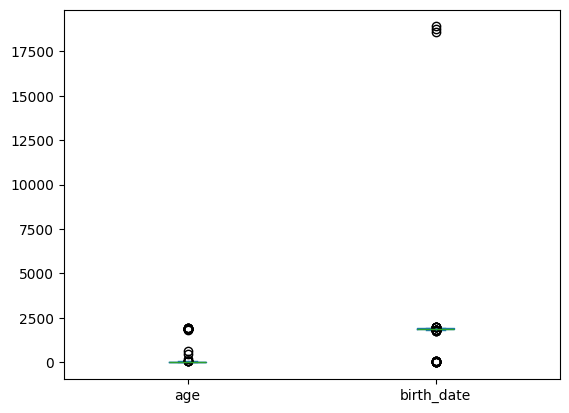

In [ ]:
# plot outliers in df

df.plot(kind='box')

In [ ]:
# remove outliers in 'age' and 'birth_date' and replace them with median

df['age'] = df['age'].apply(lambda x: df['age'].median() if x < 0 or x > 100 else x)
df['birth_date'] = df['birth_date'].apply(lambda x: df['birth_date'].median() if x < 1000 or x > 2000 else x)

In [17]:
df.to_csv("data/entities_processed_and_cleaned.csv", index=False)

Summarize dataset:  81%|████████  | 21/26 [00:02<00:00,  7.00it/s, Missing diagram heatmap]           /home/codespace/.python/current/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/codespace/.python/current/lib/python3.10/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 128.61it/s]


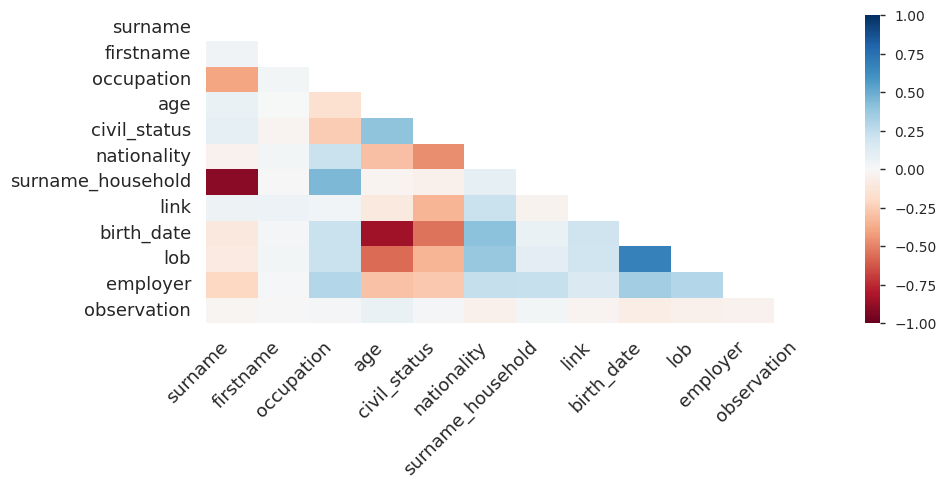

In [189]:
profile = ProfileReport(df, title="Profiling Report After Cleaning")
profile.to_file("data/output/entities_profiling_report_after_cleaning.html")

In [1]:
df.to_pickle("data/output/entities_processed_and_cleaned.pkl")

NameError: name 'df' is not defined

## EDA

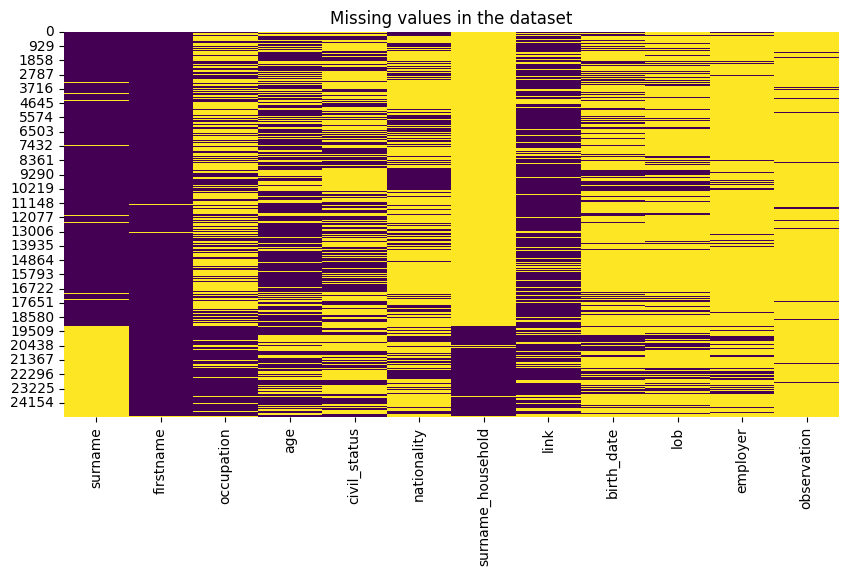

In [86]:
# plot missing values in the dataset

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

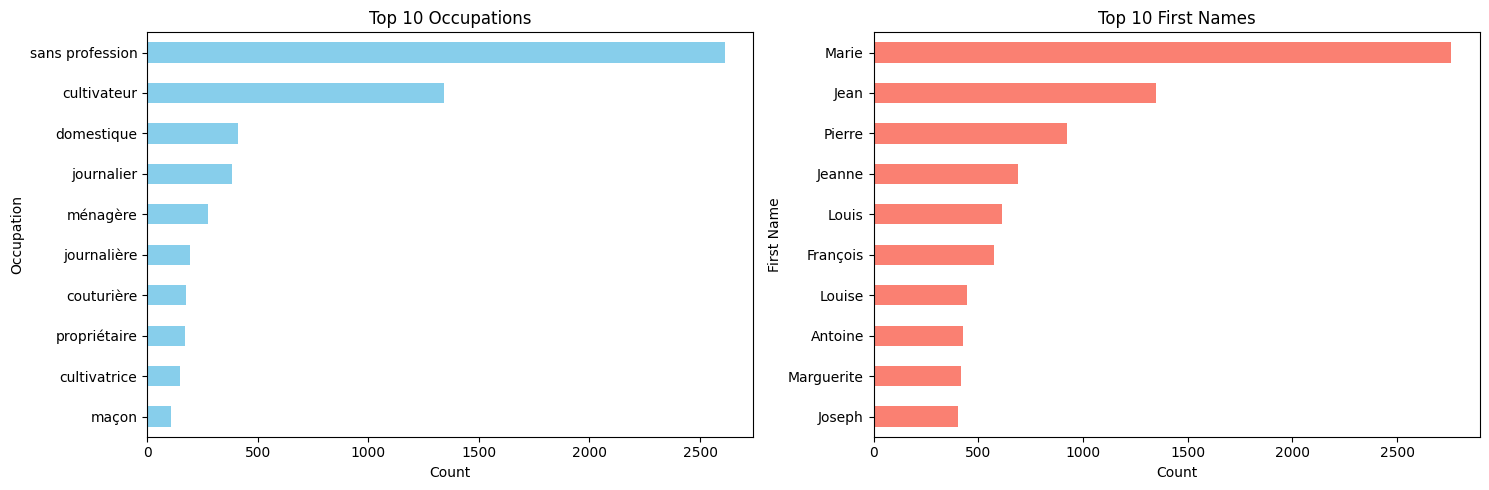

In [123]:
# plot top 10 occupations and top 10 first names in the dataset in horizontal bar plots

# top 10 occupations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
# sort the values and plot the top 10 occupations
df['occupation'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')

# top 10 first names
plt.subplot(1, 2, 2)
df['firstname'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Top 10 First Names')
plt.xlabel('Count')
plt.ylabel('First Name')

plt.tight_layout()
plt.show()